In [16]:
class Fuzzy():
    def __init__(self):
        self.min = 0  # Nilai minimum
        self.max = 0  # Nilai maksimum

    # Fungsi untuk menghitung keanggotaan fuzzy pada sisi menurun
    def down(self, x):
        return max(0, min(1, (self.max - x) / (self.max - self.min)))

    # Fungsi untuk menghitung keanggotaan fuzzy pada sisi menaik
    def up(self, x):
        return max(0, min(1, (x - self.min) / (self.max - self.min)))

    # Fungsi untuk membalik keanggotaan dari sisi menurun
    def rev_down(self, f):
        return self.max - f * (self.max - self.min)

    # Fungsi untuk membalik keanggotaan dari sisi menaik
    def rev_up(self, f):
        return f * (self.max - self.min) + self.min


In [17]:
class Income(Fuzzy):
    def __init__(self):
        super().__init__()
        self.min = 1000  # Pendapatan minimum
        self.max = 10000  # Pendapatan maksimum

    def low(self, x):
        return self.down(x)  # Menghitung keanggotaan fuzzy untuk kategori low

    def medium(self, x):
        mid = (self.max + self.min) / 2  # Titik tengah
        if x <= self.min:
            return 0
        elif x >= self.max:
            return 0
        elif self.min < x <= mid:
            return (x - self.min) / (mid - self.min)  # Keanggotaan untuk kategori medium (meningkat)
        else:
            return (self.max - x) / (self.max - mid)  # Keanggotaan untuk kategori medium (menurun)

    def high(self, x):
        return self.up(x)  # Menghitung keanggotaan fuzzy untuk kategori high

In [18]:
class Debt(Fuzzy):
    def __init__(self):
        super().__init__()
        self.min = 0  # Hutang minimum
        self.max = 10000  # Hutang maksimum

    def low(self, x):
        return self.down(x)  # Menghitung keanggotaan fuzzy untuk kategori low

    def medium(self, x):
        mid = (self.max + self.min) / 2  # Titik tengah
        if x <= self.min:
            return 0
        elif x >= self.max:
            return 0
        elif self.min < x <= mid:
            return (x - self.min) / (mid - self.min)  # Keanggotaan untuk kategori medium (meningkat)
        else:
            return (self.max - x) / (self.max - mid)  # Keanggotaan untuk kategori medium (menurun)

    def high(self, x):
        return self.up(x)  # Menghitung keanggotaan fuzzy untuk kategori high

In [19]:
class CreditHistory(Fuzzy):
    def __init__(self):
        super().__init__()
        self.min = 0  # Nilai minimum untuk riwayat kredit
        self.max = 10  # Nilai maksimum untuk riwayat kredit

    def bad(self, x):
        return self.down(x)  # Menghitung keanggotaan fuzzy untuk kategori bad

    def good(self, x):
        mid = (self.max + self.min) / 2  # Titik tengah
        if x <= self.min:
            return 0
        elif x >= self.max:
            return 0
        elif self.min < x <= mid:
            return (x - self.min) / (mid - self.min)  # Keanggotaan untuk kategori good (meningkat)
        else:
            return (self.max - x) / (self.max - mid)  # Keanggotaan untuk kategori good (menurun)

    def excellent(self, x):
        return self.up(x)  # Menghitung keanggotaan fuzzy untuk kategori excellent

In [20]:
class CreditEligibility(Fuzzy):
    def __init__(self):
        super().__init__()
        self.min = 0  # Nilai minimum untuk kelayakan kredit
        self.max = 100  # Nilai maksimum untuk kelayakan kredit

    def not_eligible(self, fuzzy_value):
        return self.rev_down(fuzzy_value)  # Menghitung kelayakan kredit tidak layak

    def eligible(self, fuzzy_value):
        return self.rev_up(fuzzy_value)  # Menghitung kelayakan kredit layak


In [21]:
rule_mapping = {
    ("low", "high", "bad"): "not_eligible",
    ("low", "medium", "good"): "not_eligible",
    ("medium", "low", "good"): "eligible",
    ("high", "low", "excellent"): "eligible",
    ("high", "medium", "good"): "eligible",
}

# Data input
income_value = 4000
debt_value = 2000
credit_history_value = 7

# Membuat objek dari setiap kelas
income = Income()
debt = Debt()
credit_history = CreditHistory()
credit_eligibility = CreditEligibility()

In [22]:
total_value = 0
total_fuzzy = 0

# Menghitung kelayakan berdasarkan aturan fuzzy
for k, v in rule_mapping.items():
    fuzzy_income = getattr(income, k[0])(income_value)
    fuzzy_debt = getattr(debt, k[1])(debt_value)
    fuzzy_credit_history = getattr(credit_history, k[2])(credit_history_value)

    fuzzy_prod = min(fuzzy_income, fuzzy_debt, fuzzy_credit_history)
    eligibility_value = getattr(credit_eligibility, v)(fuzzy_prod)

    total_value += fuzzy_prod * eligibility_value
    total_fuzzy += fuzzy_prod

result = int(total_value / total_fuzzy) if total_fuzzy > 0 else 0
status = "Layak" if result >= 50 else "Tidak Layak"
print(f"Jadi, kelayakan kredit adalah {result}% ({status}).")

Jadi, kelayakan kredit adalah 52% (Layak).


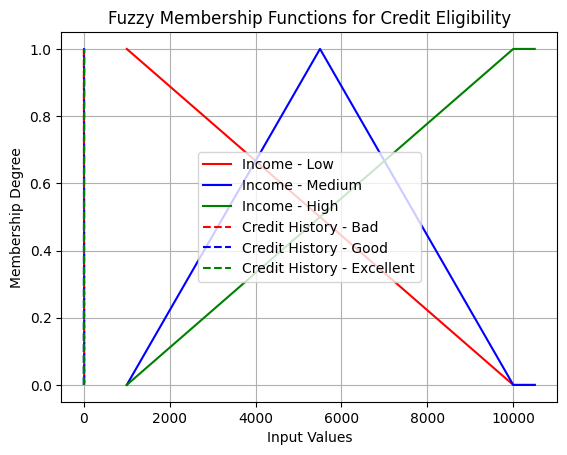

In [23]:
import matplotlib.pyplot as plt

# Visualisasi keanggotaan Income
x = list(range(1000, 11000, 500))
income = Income()
credit_history = CreditHistory()

plt.plot(x, [income.low(i) for i in x], 'r', label='Income - Low')
plt.plot(x, [income.medium(i) for i in x], 'b', label='Income - Medium')
plt.plot(x, [income.high(i) for i in x], 'g', label='Income - High')

# Visualisasi keanggotaan Credit History
x_ch = list(range(0, 11))
plt.plot(x_ch, [credit_history.bad(i) for i in x_ch], 'r--', label='Credit History - Bad')
plt.plot(x_ch, [credit_history.good(i) for i in x_ch], 'b--', label='Credit History - Good')
plt.plot(x_ch, [credit_history.excellent(i) for i in x_ch], 'g--', label='Credit History - Excellent')

# Menambahkan detail pada grafik
plt.title('Fuzzy Membership Functions for Credit Eligibility')
plt.xlabel('Input Values')
plt.ylabel('Membership Degree')
plt.legend(loc='center')
plt.grid()
plt.show()